<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/AI_HW4_woodenML_base_2026.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Соловьев Сергей***


# **Домашнее задание 4 (base): древесные алгоритмы**

### **Постановка задачи:**

У вас есть данные о полетах, обладающие следущими характеристиками:
- Для **каждого** клиента известна краткая информация о самом человеке, о типе билета и о рейсе, а также оценки клиента различным аспектам полета.
- Для **некоторых** клиентов известна их удовлетворенность полетом (satisfied или neutral or dissatisfied).

По данным необходимо обучить модель, предсказывающую удовлетворенность клиентов полетом. Итоговые предсказания нужно сделать для клиентов, **для которых ответ неизвестен.**

### **Получение данных:**

Компания держит все данные в облаке Яндекса в Postgresql. Данные разбиты на смысловые таблицы. Чтобы получить данные, вам необходимо подключиться к базе данных и добыть оттуда данные.

### **Оценивание:**

- Как всегда оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.
- Брать код из открытых источников позволительно. Следование культуре цитирования **обязательно.**

### **Баллы:**

Суммарно за задание можно получить 10 основных и 0.7 бонусных баллов.

Оценка за ДЗ = min{ваш балл, 10}

Мягкий дедлайн: 29 января 23:59

**Продуктивной и интересной вам работы!**

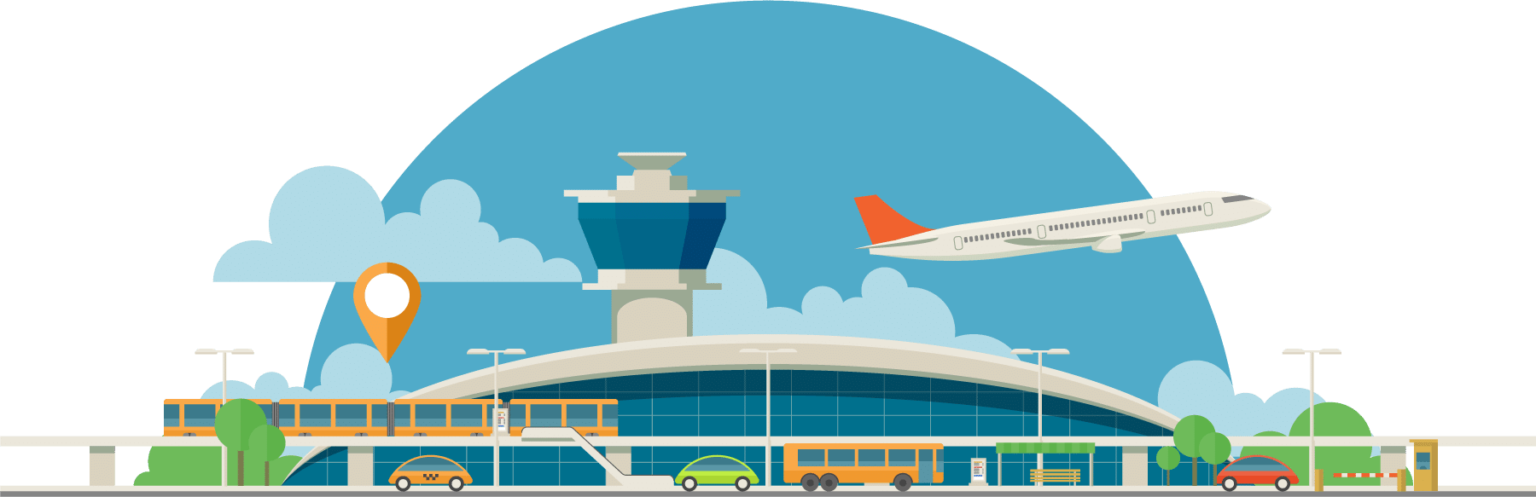

In [1]:
# установка всех библиотек, необходимых для выполнения ДЗ

%pip install catboost
%pip install mlxtend --upgrade
%pip install optuna
%pip install lime
%pip install shap
%pip install missingno
%pip install psycopg2-binary
%pip install xgboost
%pip install lightgbm
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:

%pip install missingno
%pip install psycopg2-binary
%pip install mlxtend
%pip install graphviz
%pip install catboost
%pip install psycopg2-binary
%pip install xgboost
%pip install lightgbm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno

import psycopg2
import psycopg2.extras

from mlxtend.plotting import plot_decision_regions
from mlxtend.evaluate import bias_variance_decomp
from graphviz import Source
from sklearn.tree import export_graphviz
from IPython.display import SVG

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, RocCurveDisplay
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.calibration import CalibrationDisplay
from sklearn.isotonic import IsotonicRegression

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, mutual_info_classif
from sklearn.feature_selection import SequentialFeatureSelector, RFE, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator

import shap
import lime
import lime.lime_tabular

import optuna

import pickle

np.random.seed(42)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# **Часть 1: Получение данных, обработка и EDA (2.75 балла)**

В этой части вам необходимо:
- Загрузить данные из БД и предобработать их (1.75 бала)
- Провести разведочный анализ данных (1. балл)

## **1. 1. Загрузка и предобработка данных (1.75 балла)**

In [3]:
!mkdir -p ~/.postgresql && \
wget "https://storage.yandexcloud.net/cloud-certs/CA.pem" \
    --output-document ~/.postgresql/root.crt && \
chmod 0600 ~/.postgresql/root.crt

�訡�� � ᨭ⠪�� �������.


### **Задание 1. Получение данных (0.5 балла)**

- Подключитесь к БД при помощи `psycopg2.connect()`
- Напишите SQL-запрос, объединяющий 3 нужные таблицы в одну
- Результат запроса поместите в `pd.DataFrame`. Индексом получившегося датафрейма сделайте столбец 'id'.

Список столбцов таблиц добудьте самостоятельно.


**Примечание:**
 Не забудьте закрыть соединение. Или открывайте соединение, используя менеджер контекста `with as`, который закроет его автоматически

##### **Параметры соединения:**
```
host=rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net
port=6432
sslmode=verify-full
dbname=db_flights
user=mlhs_student
password=mlhs_student
target_session_attrs=read-write```
```

##### **Схема БД**

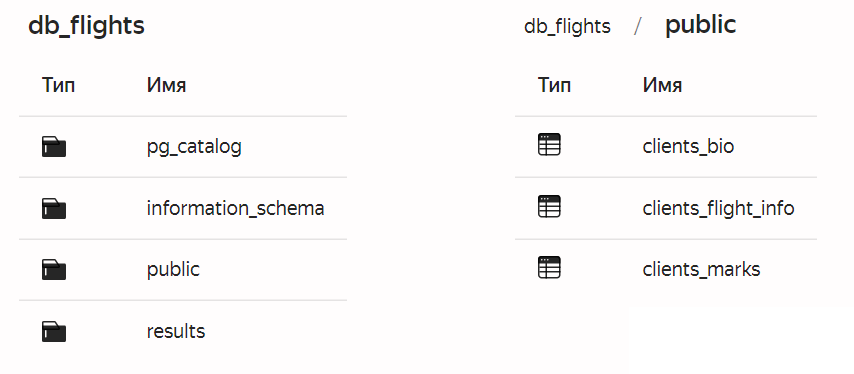



In [4]:
# Подготовка сертификата для подключения к БД
%pip install psycopg2
import os
import urllib.request
import psycopg2

# Создаем директорию для сертификата (для Windows)
cert_dir = os.path.join(os.path.expanduser('~'), '.postgresql')
os.makedirs(cert_dir, exist_ok=True)
cert_path = os.path.join(cert_dir, 'root.crt')

# Скачиваем сертификат, если его еще нет
if not os.path.exists(cert_path):
    print("Скачиваю сертификат...")
    urllib.request.urlretrieve('https://storage.yandexcloud.net/cloud-certs/CA.pem', cert_path)
    print(f"Сертификат сохранен в: {cert_path}")

# Подключение к БД
conn_params = {
    'host': 'rc1b-70q90cunwkzx49mj.mdb.yandexcloud.net',
    'port': 6432,
    'sslmode': 'verify-full',
    'dbname': 'db_flights',
    'user': 'mlhs_student',
    'password': 'mlhs_student',
    'target_session_attrs': 'read-write',
    'sslrootcert': cert_path  # Указываем путь к сертификату
}

# Подключение с использованием менеджера контекста
with psycopg2.connect(**conn_params) as conn:
    # Получаем список таблиц
    with conn.cursor() as cur:
        cur.execute("""
            SELECT table_name 
            FROM information_schema.tables 
            WHERE table_schema = 'public'
            ORDER BY table_name;
        """)
        tables = cur.fetchall()
        print("Доступные таблицы:")
        for table in tables:
            print(f"  - {table[0]}")
    
    # Изучаем структуру таблиц для понимания связей
    table_columns = {}
    with conn.cursor() as cur:
        for table_name in [t[0] for t in tables]:
            cur.execute(f"""
                SELECT column_name, data_type 
                FROM information_schema.columns 
                WHERE table_name = '{table_name}'
                ORDER BY ordinal_position;
            """)
            columns = cur.fetchall()
            table_columns[table_name] = [col[0] for col in columns]
            print(f"\nСтруктура таблицы {table_name}:")
            for col in columns:
                print(f"  {col[0]}: {col[1]}")
    
    # Напишем SQL-запрос для объединения 3 таблиц
    # Объединяем clients_flight_info, clients_marks и clients_bio по id
    # Важно: исключаем дубликаты столбца id из других таблиц
    # Получаем списки столбцов для каждой таблицы
    flights_cols = table_columns.get('clients_flight_info', [])
    marks_cols = table_columns.get('clients_marks', [])
    bio_cols = table_columns.get('clients_bio', [])
    
    # Исключаем id из marks и bio, так как он уже есть в flights
    marks_cols_no_id = [col for col in marks_cols if col != 'id']
    bio_cols_no_id = [col for col in bio_cols if col != 'id']
    
    # Функция для экранирования имен столбцов (добавляем двойные кавычки если есть пробелы)
    def escape_col(col_name):
        if ' ' in col_name or '/' in col_name:
            return f'"{col_name}"'
        return col_name
    
    # Формируем список столбцов для SELECT с правильным экранированием
    select_cols = [f'cfi.{escape_col(col)}' for col in flights_cols]
    select_cols.extend([f'cm.{escape_col(col)}' for col in marks_cols_no_id])
    select_cols.extend([f'cb.{escape_col(col)}' for col in bio_cols_no_id])
    
    query = f"""
    SELECT
        {', '.join(select_cols)}
    FROM clients_flight_info cfi
    JOIN clients_marks cm ON cfi.id = cm.id
    JOIN clients_bio cb ON cfi.id = cb.id
    ORDER BY cfi.id;
    """
    
    # Выполняем запрос и получаем данные
    # Используем INNER JOIN чтобы получить только пересечение всех трех таблиц
    # Используем index_col='id' чтобы сразу установить id как индекс
    df = pd.read_sql_query(query, conn, index_col='id')
    
    # Проверяем на дубликаты по индексу и удаляем их, если есть
    # (может быть, если в одной из таблиц есть дубликаты id)
    if df.index.duplicated().any():
        print(f"Найдены дубликаты по id: {df.index.duplicated().sum()}. Удаляем...")
        df = df[~df.index.duplicated(keep='first')]
    
    # Удаляем дубликаты столбцов, оставляя первые вхождения
    # Если pandas добавил суффиксы (_x, _y), удаляем столбцы с суффиксами
    cols_to_drop = []
    for col in df.columns:
        if col.endswith('_x') or col.endswith('_y'):
            base_col = col.rsplit('_', 1)[0]
            # Если есть оригинальный столбец без суффикса, удаляем с суффиксом
            if base_col in df.columns:
                cols_to_drop.append(col)
    
    if cols_to_drop:
        df = df.drop(columns=cols_to_drop)
    
    # Удаляем полностью дублирующиеся столбцы
    df = df.loc[:, ~df.columns.duplicated(keep='first')]
    
    # ИСПРАВЛЕНИЕ: Преобразуем числовые колонки из строк в числа
    # В базе данных все числовые колонки хранятся как text, поэтому при чтении они становятся строками
    cat_cols = ['Customer Type', 'Type of Travel', 'class', 'satisfaction', 'gender']
    num_cols = [c for c in df.columns if c not in cat_cols]
    
    # Преобразуем числовые колонки в float64
    for col in num_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

print(f"\nРазмер датафрейма: {df.shape}")
print(f"\nТипы данных после преобразования:")
print(df.dtypes)
print(f"\nЧисловые столбцы: {df.select_dtypes(include='number').columns.tolist()}")
print(f"Категориальные столбцы: {df.select_dtypes(include=['object', 'string']).columns.tolist()}")
print(f"\nПервые 5 строк:")
df.head()

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Доступные таблицы:
  - clients_bio
  - clients_flight_info
  - clients_marks
  - results.student_predictions
  - student_predictions

Структура таблицы clients_bio:
  id: integer
  gender: text
  age: text

Структура таблицы clients_flight_info:
  id: integer
  Customer Type: text
  Type of Travel: text
  class: text
  Flight Distance: text
  Departure Delay in Minutes: text
  Arrival Delay in Minutes: text

Структура таблицы clients_marks:
  id: integer
  Inflight wifi service: text
  Departure/Arrival time convenient: text
  Ease of Online booking: text
  Gate location: text
  Food and drink: text
  Online boarding: text
  Seat comfort: text
  Inflight entertainment: text
  On-board service: text
  Leg room service: text
  Baggage handling: text
  Checkin service: text
  Inflight service: text
  cleanliness: text
  satisfaction: text

Структура таблицы results.student_predictions:
  surname: text
  id: bigint
  prediction: bigint

Структура таблицы student_predictions:
  index: bigin

C:\Users\user\AppData\Local\Temp\ipykernel_20120\4258342707.py:96: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn, index_col='id')



Размер датафрейма: (129549, 23)

Типы данных после преобразования:
Customer Type                            str
Type of Travel                           str
class                                    str
Flight Distance                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg room service                     float64
Baggage handling                     float64
Checkin service                      float64
Inflight service                     float64
cleanliness                          float64
satisfaction                    

,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness,satisfaction,gender,age
id,,,,,,,,,,,,,,,,,,,,,
1,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,3.0,3.0,...,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied,Male,48.0
2,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied,Female,35.0
3,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,4.0,4.0,...,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied,Male,41.0
4,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied,Male,50.0
5,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied,Female,49.0


In [5]:
assert df.shape == (129_549, 23)

### **Задание 2 (0.25 балла)**

- Преобразуйте числовые столбцы в `float`. Проверьте, есть ли в датафрейме пропуски и выбросы (в том числе в категориальных признаках)</font>.

In [6]:


# 1. Преобразуем числовые столбцы в float
# ИСПРАВЛЕНИЕ: Определяем числовые колонки по именам, так как они могут быть object dtype
cat_cols = ['Customer Type', 'Type of Travel', 'class', 'satisfaction', 'gender']
numeric_cols = [c for c in df.columns if c not in cat_cols]

print(f"Числовые столбцы для преобразования ({len(numeric_cols)}): {numeric_cols}")
print(f"Типы данных до преобразования:\n{df[numeric_cols].dtypes}\n")

# Преобразуем числовые столбцы в float (безопасно, если они уже строки)
for col in numeric_cols:
    # Если колонка уже числовая, просто приводим к float64
    # Если колонка строка (object), преобразуем через pd.to_numeric
    if df[col].dtype in ['object', 'string']:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col] = df[col].astype('float64')

print(f"Типы данных после преобразования:\n{df[numeric_cols].dtypes}\n")

# 2. Проверка пропусков
print("=" * 60)
print("ПРОВЕРКА ПРОПУСКОВ")
print("=" * 60)
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Количество пропусков': missing_values,
    'Процент пропусков': missing_percent
})
missing_df = missing_df[missing_df['Количество пропусков'] > 0].sort_values('Количество пропусков', ascending=False)

if len(missing_df) > 0:
    print(f"\nНайдено пропусков в {len(missing_df)} столбцах:\n")
    print(missing_df)
else:
    print("\nПропусков не обнаружено!")

print(f"\nОбщее количество пропусков: {df.isnull().sum().sum()}")
print(f"Общий процент пропусков: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%\n")

# 3. Проверка выбросов
print("=" * 60)
print("ПРОВЕРКА ВЫБРОСОВ")
print("=" * 60)

# Для числовых столбцов используем IQR метод
# Используем уже определенные числовые колонки
numeric_cols_for_outliers = numeric_cols
outliers_info = []

for col in numeric_cols_for_outliers:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percent = (outlier_count / len(df)) * 100
    
    if outlier_count > 0:
        outliers_info.append({
            'Столбец': col,
            'Количество выбросов': outlier_count,
            'Процент выбросов': f"{outlier_percent:.2f}%",
            'Нижняя граница': f"{lower_bound:.2f}",
            'Верхняя граница': f"{upper_bound:.2f}",
            'Мин значение': f"{df[col].min():.2f}",
            'Макс значение': f"{df[col].max():.2f}"
        })

if outliers_info:
    outliers_df = pd.DataFrame(outliers_info)
    print(f"\nВыбросы в числовых столбцах (метод IQR):\n")
    print(outliers_df.to_string(index=False))
else:
    print("\nВыбросов в числовых столбцах не обнаружено!")

# Для категориальных столбцов проверяем редкие значения (выбросы - это очень редкие категории)
print("\n" + "=" * 60)
print("ПРОВЕРКА ВЫБРОСОВ В КАТЕГОРИАЛЬНЫХ ПРИЗНАКАХ")
print("=" * 60)
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_outliers = []

for col in categorical_cols:
    value_counts = df[col].value_counts()
    total_count = len(df)
    
    # Считаем выбросами категории, которые встречаются менее чем в 0.1% случаев
    rare_threshold = total_count * 0.001
    rare_values = value_counts[value_counts < rare_threshold]
    
    if len(rare_values) > 0:
        rare_percent = (rare_values.sum() / total_count) * 100
        categorical_outliers.append({
            'Столбец': col,
            'Количество редких категорий': len(rare_values),
            'Количество записей с редкими значениями': rare_values.sum(),
            'Процент редких значений': f"{rare_percent:.2f}%",
            'Примеры редких значений': ', '.join([str(v) for v in rare_values.head(3).index.tolist()])
        })

if categorical_outliers:
    cat_outliers_df = pd.DataFrame(categorical_outliers)
    print(f"\nРедкие значения (выбросы) в категориальных столбцах:\n")
    print(cat_outliers_df.to_string(index=False))
else:
    print("\nВыбросов в категориальных столбцах не обнаружено!")

# Дополнительная информация о категориальных признаках
print("\n" + "=" * 60)
print("ДОПОЛНИТЕЛЬНАЯ ИНФОРМАЦИЯ О КАТЕГОРИАЛЬНЫХ ПРИЗНАКАХ")
print("=" * 60)
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"  Уникальных значений: {unique_count}")
    print(f"  Топ-5 наиболее частых значений:")
    top_values = df[col].value_counts().head(5)
    for val, count in top_values.items():
        print(f"    {val}: {count} ({count/len(df)*100:.2f}%)")





Числовые столбцы для преобразования (18): ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'cleanliness', 'age']
Типы данных до преобразования:
Flight Distance                      float64
Departure Delay in Minutes           float64
Arrival Delay in Minutes             float64
Inflight wifi service                float64
Departure/Arrival time convenient    float64
Ease of Online booking               float64
Gate location                        float64
Food and drink                       float64
Online boarding                      float64
Seat comfort                         float64
Inflight entertainment               float64
On-board service                     float64
Leg 

C:\Users\user\AppData\Local\Temp\ipykernel_20120\3502659602.py:83: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns


### **Задание 3 (0.5 балла)**

Воспользуйтесь модулем `missingno` для визуализации пропусков в датафрейме. Постройте:
-  `matrix` пропущенных значений;
- столбчатую диаграмму в **логарифмированной** шкале (так как пропусков немного, по обычной не будет видно, в каких столбцах их больше)

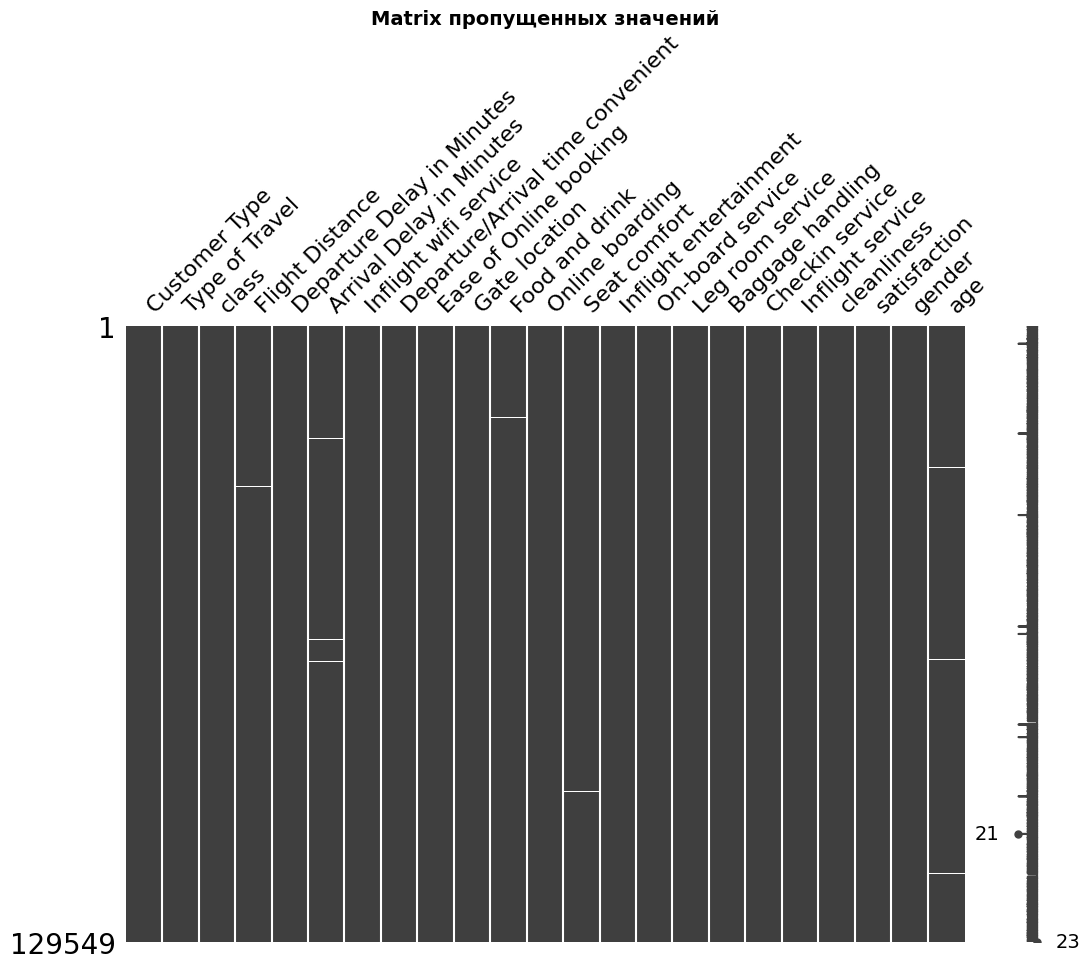

In [7]:
# Ваш код ниже
# Построение matrix пропущенных значений
missingno.matrix(df, figsize=(12, 8))
plt.title('Matrix пропущенных значений', fontsize=14, fontweight='bold')
plt.show()



c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\missingno\missingno.py:271: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels([int(n * len(df)) for n in ax1.get_yticks()], fontsize=fontsize)


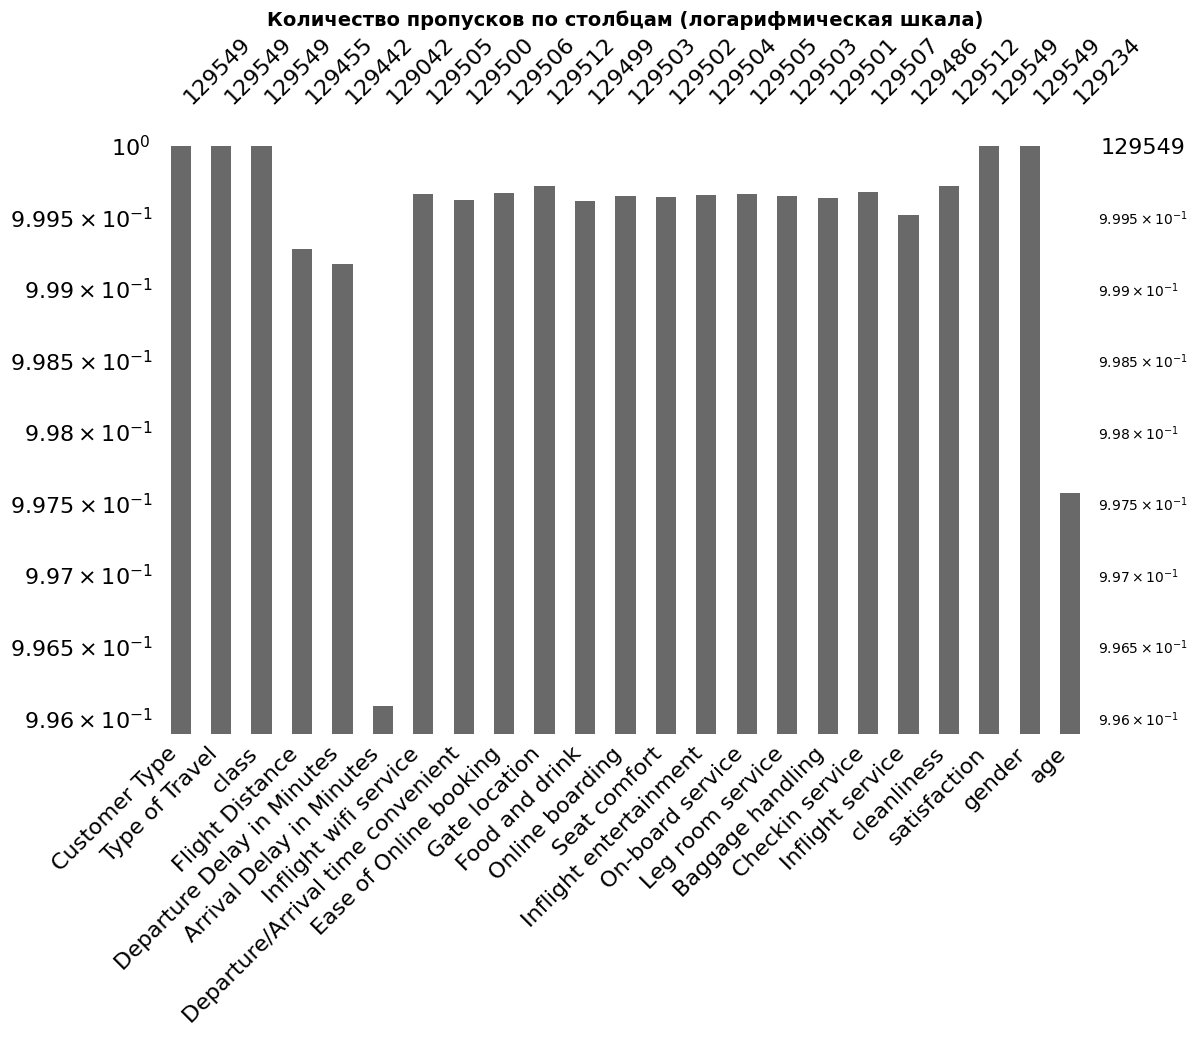

In [8]:
# Ваш код ниже
# Столбчатая диаграмма пропусков в логарифмированной шкале
missingno.bar(df, figsize=(12, 8), log=True)
plt.title('Количество пропусков по столбцам (логарифмическая шкала)', fontsize=14, fontweight='bold')
plt.show()


Разобьем датасет на тренировочную и тестовую части. Тестовую часть отложим надолго -- до самого конца этого ноутбука.

In [9]:
df_train = df[df.satisfaction != '-']
df_train

,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness,satisfaction,gender,age
id,,,,,,,,,,,,,,,,,,,,,
1,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,3.0,3.0,3.0,...,5.0,3.0,2.0,5.0,4.0,5.0,5.0,neutral or dissatisfied,Male,48.0
2,Loyal Customer,Business travel,Business,821.0,26.0,39.0,2.0,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,3.0,5.0,5.0,satisfied,Female,35.0
3,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,4.0,4.0,4.0,...,3.0,3.0,3.0,3.0,4.0,3.0,5.0,satisfied,Male,41.0
4,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,2.0,2.0,2.0,...,5.0,5.0,5.0,5.0,3.0,5.0,4.0,satisfied,Male,50.0
5,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,3.0,3.0,3.0,5.0,satisfied,Female,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Loyal Customer,Personal Travel,Eco Plus,337.0,0.0,0.0,4.0,2.0,4.0,4.0,...,3.0,1.0,5.0,3.0,4.0,4.0,3.0,neutral or dissatisfied,Female,28.0
129875,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,4.0,3.0,4.0,...,4.0,4.0,3.0,4.0,4.0,4.0,4.0,neutral or dissatisfied,Female,55.0
129878,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,5.0,2.0,1.0,...,3.0,3.0,4.0,5.0,4.0,4.0,3.0,neutral or dissatisfied,Male,42.0


In [10]:
assert df_train.shape == (103_644, 23)

In [11]:
df_test = df[df.satisfaction == '-'].drop('satisfaction', axis=1)
df_test

,Customer Type,Type of Travel,class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,cleanliness,gender,age
id,,,,,,,,,,,,,,,,,,,,,
17,Loyal Customer,Personal Travel,Eco,821.0,0.0,0.0,2.0,3.0,2.0,3.0,...,1.0,5.0,5.0,2.0,5.0,5.0,5.0,2.0,Female,48.0
20,Loyal Customer,Personal Travel,Eco,821.0,4.0,0.0,3.0,3.0,3.0,4.0,...,4.0,1.0,1.0,3.0,1.0,3.0,1.0,3.0,Female,42.0
35,Loyal Customer,Business travel,Business,1672.0,23.0,17.0,2.0,2.0,2.0,2.0,...,5.0,3.0,3.0,4.0,5.0,5.0,3.0,5.0,Male,39.0
44,Loyal Customer,Business travel,Business,2077.0,0.0,1.0,4.0,1.0,4.0,4.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,Male,51.0
49,disloyal Customer,Business travel,Eco,108.0,0.0,29.0,4.0,5.0,4.0,1.0,...,3.0,5.0,5.0,4.0,5.0,5.0,4.0,5.0,Male,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129847,Loyal Customer,Personal Travel,Eco,337.0,0.0,0.0,0.0,4.0,0.0,5.0,...,3.0,3.0,5.0,2.0,4.0,4.0,5.0,3.0,Female,16.0
129868,Loyal Customer,Business travel,Eco Plus,447.0,0.0,0.0,3.0,4.0,4.0,4.0,...,4.0,4.0,2.0,5.0,3.0,1.0,4.0,4.0,Male,47.0
129872,Loyal Customer,Business travel,Eco Plus,337.0,0.0,1.0,4.0,2.0,4.0,2.0,...,4.0,4.0,5.0,1.0,3.0,5.0,1.0,4.0,Female,32.0


In [12]:
assert df_test.shape == (25_905, 22)

Разбиваем данные на трейн и валидацию. Не меняйте сид

In [13]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop('satisfaction', axis=1), df_train.satisfaction, test_size=0.3, random_state=42)

In [14]:
assert X_train.shape == (72_550, 22)
assert X_val.shape == (31_094, 22)

### **Задание 4. (0.15 балла)**

Заполните пропуски в данных наиболее часто встречающимся значением.
Помните про правильность заполнения.

**Примечание:** Мы также могли восстановать пропуски `KNNImputer`'ом или `IterativeImputer`'ом. Как правило, такое заполнение точнее и лучше сохраняет структуру распределений. Но для признаков в нашей задаче Imputer'ы, реализованные библиотечно не подошли бы. Они возвращали бы вещественные значения, а в нашей задаче все признаки целые.

In [15]:
# Ваш код ниже

# Важно: для правильного заполнения используем моды из train набора
# для заполнения пропусков в обоих наборах (train и test), чтобы избежать data leakage

# Вычисляем наиболее часто встречающиеся значения (моды) для каждого столбца в train наборе
mode_values = df_train.mode().iloc[0]  # Берем первую моду, если их несколько

print("Проверка пропусков ДО заполнения:")
print(f"Пропусков в train: {df_train.isnull().sum().sum()}")
print(f"Пропусков в test: {df_test.isnull().sum().sum()}\n")

# Заполняем пропуски в train наборе
df_train = df_train.fillna(mode_values)

# Заполняем пропуски в test наборе теми же модами из train (правильность заполнения)
df_test = df_test.fillna(mode_values)

print("Проверка пропусков ПОСЛЕ заполнения:")
print(f"Пропусков в train: {df_train.isnull().sum().sum()}")
print(f"Пропусков в test: {df_test.isnull().sum().sum()}")

# Выводим информацию о заполненных столбцах
filled_cols = df_train.isnull().sum()[df_train.isnull().sum() > 0].index.tolist()
if len(filled_cols) == 0:
    print("\nВсе пропуски успешно заполнены!")
else:
    print(f"\nСтолбцы с пропусками после заполнения: {filled_cols}")




Проверка пропусков ДО заполнения:
Пропусков в train: 1327
Пропусков в test: 337

Проверка пропусков ПОСЛЕ заполнения:
Пропусков в train: 0
Пропусков в test: 0

Все пропуски успешно заполнены!


### **Задание 5. (0.1 балла)**

- Выведите основные статистики по числовым и категориальным столбцам таблицы
- Сделайте **текстовый** вывод о распределениях значений признаков

In [16]:
# Ваш код ниже

# 1. Основные статистики по числовым столбцам
print("=" * 80)
print("ОСНОВНЫЕ СТАТИСТИКИ ПО ЧИСЛОВЫМ СТОЛБЦАМ")
print("=" * 80)
numeric_cols = df_train.select_dtypes(include=['number']).columns
print(f"\nЧисловые столбцы ({len(numeric_cols)}): {list(numeric_cols)}\n")
if len(numeric_cols) > 0:
    print(df_train[numeric_cols].describe())
else:
    print("Числовые столбцы не найдены.")

# 2. Основные статистики по категориальным столбцам
print("\n" + "=" * 80)
print("ОСНОВНЫЕ СТАТИСТИКИ ПО КАТЕГОРИАЛЬНЫМ СТОЛБЦАМ")
print("=" * 80)
categorical_cols = df_train.select_dtypes(include=['object']).columns
print(f"\nКатегориальные столбцы ({len(categorical_cols)}): {list(categorical_cols)}\n")
if len(categorical_cols) > 0:
    print(df_train[categorical_cols].describe())
else:
    print("Категориальные столбцы не найдены.")

# 3. Текстовый вывод о распределениях значений признаков
print("\n" + "=" * 80)
print("АНАЛИЗ РАСПРЕДЕЛЕНИЙ ЗНАЧЕНИЙ ПРИЗНАКОВ")
print("=" * 80)

print("\n--- ЧИСЛОВЫЕ ПРИЗНАКИ ---\n")
if len(numeric_cols) > 0:
    for col in numeric_cols:
        mean_val = df_train[col].mean()
        median_val = df_train[col].median()
        std_val = df_train[col].std()
        min_val = df_train[col].min()
        max_val = df_train[col].max()
        unique_count = df_train[col].nunique()
        
        print(f"{col}:")
        print(f"  Среднее: {mean_val:.2f}, Медиана: {median_val:.2f}, Стд. отклонение: {std_val:.2f}")
        print(f"  Диапазон: [{min_val:.2f}, {max_val:.2f}]")
        print(f"  Уникальных значений: {unique_count}")
        
        # Проверка на симметричность распределения
        if abs(mean_val - median_val) < std_val * 0.1:
            skewness = "примерно симметричное"
        elif mean_val > median_val:
            skewness = "скошено вправо (положительная асимметрия)"
        else:
            skewness = "скошено влево (отрицательная асимметрия)"
        print(f"  Распределение: {skewness}")
        
        # Проверка на дискретность (если уникальных значений немного, признак дискретный)
        if unique_count <= 10:
            print(f"  Тип: дискретный признак (оценочная шкала)")
        else:
            print(f"  Тип: непрерывный признак")
        print()
else:
    print("Числовые признаки отсутствуют.")

print("\n--- КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ---\n")
if len(categorical_cols) > 0:
    for col in categorical_cols:
        unique_count = df_train[col].nunique()
        value_counts = df_train[col].value_counts()
        top_value = value_counts.index[0]
        top_count = value_counts.iloc[0]
        top_percent = (top_count / len(df_train)) * 100
        
        print(f"{col}:")
        print(f"  Уникальных значений: {unique_count}")
        print(f"  Наиболее частое значение: '{top_value}' ({top_count} раз, {top_percent:.2f}%)")
        
        # Оценка равномерности распределения
        if top_percent > 50:
            distribution = "сильно неравномерное (доминирует одно значение)"
        elif top_percent > 30:
            distribution = "неравномерное (есть доминирующее значение)"
        elif unique_count <= 5:
            distribution = "относительно равномерное (небольшое количество категорий)"
        else:
            distribution = "разнообразное (много категорий)"
        print(f"  Распределение: {distribution}")
        
        # Показываем топ-3 значения
        print(f"  Топ-3 значения:")
        for i, (val, count) in enumerate(value_counts.head(3).items(), 1):
            percent = (count / len(df_train)) * 100
            print(f"    {i}. '{val}': {count} ({percent:.2f}%)")
        print()
else:
    print("Категориальные признаки отсутствуют.")



ОСНОВНЫЕ СТАТИСТИКИ ПО ЧИСЛОВЫМ СТОЛБЦАМ

Числовые столбцы (18): ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'cleanliness', 'age']

       Flight Distance  Departure Delay in Minutes  Arrival Delay in Minutes  \
count    103644.000000               103644.000000             103644.000000   
mean       1325.253580                   15.801638                 16.713712   
std        4652.092364                   73.937019                108.985489   
min           0.000000                    0.000000                  0.000000   
25%         414.000000                    0.000000                  0.000000   
50%         844.000000                    0.000000                  0.0

C:\Users\user\AppData\Local\Temp\ipykernel_20120\1123864703.py:18: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df_train.select_dtypes(include=['object']).columns


Customer Type:
  Уникальных значений: 3
  Наиболее частое значение: 'Loyal Customer' (84655 раз, 81.68%)
  Распределение: сильно неравномерное (доминирует одно значение)
  Топ-3 значения:
    1. 'Loyal Customer': 84655 (81.68%)
    2. 'disloyal Customer': 18923 (18.26%)
    3. 'nan': 66 (0.06%)

Type of Travel:
  Уникальных значений: 3
  Наиболее частое значение: 'Business travel' (71423 раз, 68.91%)
  Распределение: сильно неравномерное (доминирует одно значение)
  Топ-3 значения:
    1. 'Business travel': 71423 (68.91%)
    2. 'Personal Travel': 32133 (31.00%)
    3. 'nan': 88 (0.08%)

class:
  Уникальных значений: 4
  Наиболее частое значение: 'Business' (49487 раз, 47.75%)
  Распределение: неравномерное (есть доминирующее значение)
  Топ-3 значения:
    1. 'Business': 49487 (47.75%)
    2. 'Eco': 46599 (44.96%)
    3. 'Eco Plus': 7469 (7.21%)

satisfaction:
  Уникальных значений: 2
  Наиболее частое значение: 'neutral or dissatisfied' (58732 раз, 56.67%)
  Распределение: сильно нер

**ВЫВОДЫ О РАСПРЕДЕЛЕНИЯХ ЗНАЧЕНИЙ ПРИЗНАКОВ**

================================================================================

**Числовые признаки:**

1. **Непрерывные признаки с сильной асимметрией:**
   - `Flight Distance` (среднее: 1325.25, медиана: 844.00) — распределение скошено вправо, что указывает на наличие выбросов (максимум 379620)
   - `Departure Delay in Minutes` и `Arrival Delay in Minutes` (медианы: 0.00) — сильно скошены вправо, большинство рейсов без задержек

2. **Оценочные признаки (шкала 0-5):**
   - Большинство оценочных признаков имеют медиану 3-4 и средние значения в диапазоне 2.73-3.64
   - Признаки с отрицательной асимметрией (медиана > среднего): `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`, `Inflight service` — клиенты склонны давать более высокие оценки
   - Признаки с положительной асимметрией: `Food and drink`, `Online boarding`, `Checkin service`, `cleanliness` — оценки ниже среднего
   - Примерно симметричные: `Departure/Arrival time convenient`, `Gate location`

3. **Возраст (`age`):**
   - Распределение примерно симметричное (среднее: 40.06, медиана: 40.00)
   - Наличие выбросов (максимум 612) требует проверки

**Категориальные признаки:**

1. **Сильно неравномерные распределения:**
   - `Customer Type`: 81.68% — 'Loyal Customer', только 18.26% — 'disloyal Customer'
   - `Type of Travel`: 68.91% — 'Business travel', 31.00% — 'Personal Travel'
   - `satisfaction`: 56.67% — 'neutral or dissatisfied', 43.33% — 'satisfied' (классы несбалансированы)

2. **Неравномерное распределение:**
   - `class`: 47.75% — 'Business', 44.96% — 'Eco', 7.21% — 'Eco Plus'

3. **Почти равномерное распределение:**
   - `gender`: 50.74% — 'Female', 49.26% — 'Male' — практически сбалансировано

**Важные наблюдения:**
- Класс `satisfaction` несбалансирован (56.67% vs 43.33%), что может потребовать применения техник балансировки
- Большинство категориальных признаков имеют доминирующие значения, что может снизить информативность признаков
- Наличие выбросов в `Flight Distance`, `age` и признаках задержек требует обработки

### **Задание 6 (0.25 балла)**

- Удалите строки c выбросами в числовых столбцах (для трейна и валидации; тест оставьте без изменений).

**Примечание:** Выбросами считайте значения признака, строго превышающие 0.996-квантиль.

По определению, квантиль — значение, которое заданная случайная величина не превышает с фиксированной вероятностью. То есть, если мы смотрим на квантиль 0.996-квантиль, то значения после этого квантиля встречаются в 0.004% случаев. В среднем для всех признаков эти значения начинаются ~в этом квантиле.



In [17]:
# Ваш код ниже
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Обучаем дерево решений с параметрами по умолчанию
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Предсказываем на валидационной подвыборке
y_val_pred = dt.predict(X_val)

# Выводим accuracy_score для валидационной подвыборки
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy на валидационной подвыборке: {val_accuracy:.4f}")

# 1. Находим числовые столбцы
numeric_cols = X_train.select_dtypes(include=['number']).columns

# 2. Вычисляем 0.996-квантиль для каждого числового столбца на основе train данных
quantiles_0996 = X_train[numeric_cols].quantile(0.996)

print("0.996-квантили для числовых признаков:")
print(quantiles_0996)
print(f"\nРазмер X_train до удаления выбросов: {X_train.shape}")
print(f"Размер X_val до удаления выбросов: {X_val.shape}")

# 3. Находим строки с выбросами в X_train (значения строго превышающие квантиль)
outliers_mask_train = pd.Series(False, index=X_train.index)
for col in numeric_cols:
    outliers_mask_train |= (X_train[col] > quantiles_0996[col])

# 4. Находим строки с выбросами в X_val
outliers_mask_val = pd.Series(False, index=X_val.index)
for col in numeric_cols:
    outliers_mask_val |= (X_val[col] > quantiles_0996[col])

# 5. Удаляем выбросы из X_train и X_val
X_train_clean = X_train[~outliers_mask_train].copy()
X_val_clean = X_val[~outliers_mask_val].copy()

# 6. Обновляем соответствующие y_train и y_val
y_train_clean = y_train[~outliers_mask_train].copy()
y_val_clean = y_val[~outliers_mask_val].copy()

print(f"\nУдалено строк из X_train: {outliers_mask_train.sum()}")
print(f"Удалено строк из X_val: {outliers_mask_val.sum()}")

print(f"\nРазмер X_train после удаления выбросов: {X_train_clean.shape}")
print(f"Размер X_val после удаления выбросов: {X_val_clean.shape}")

# 7. Переименовываем обратно для дальнейшей работы
X_train = X_train_clean
X_val = X_val_clean
y_train = y_train_clean
y_val = y_val_clean

0.996-квантили для числовых признаков:
Flight Distance                      3980.988
Departure Delay in Minutes            259.000
Arrival Delay in Minutes              262.000
Inflight wifi service                   5.000
Departure/Arrival time convenient       5.000
Ease of Online booking                  5.000
Gate location                           5.000
Food and drink                          5.000
Online boarding                         5.000
Seat comfort                            5.000
Inflight entertainment                  5.000
On-board service                        5.000
Leg room service                        5.000
Baggage handling                        5.000
Checkin service                         5.000
Inflight service                        5.000
cleanliness                             5.000
age                                    80.000
Name: 0.996, dtype: float64

Размер X_train до удаления выбросов: (72550, 22)
Размер X_val до удаления выбросов: (31094, 22)

Удалено

In [18]:
assert df_test.shape == (25_905, 22)

## **1. 2. EDA (1 балл)**

Создадим переменные с перечислениями столбцов разного типа

In [19]:
continuous_cols = ['age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_cols = list(set(df.select_dtypes(include='number').columns) - set(continuous_cols))
categorical_cols = list(df.select_dtypes(include='object').columns)[:-1]

C:\Users\user\AppData\Local\Temp\ipykernel_20120\1013457405.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = list(df.select_dtypes(include='object').columns)[:-1]


In [20]:
assert len(continuous_cols + ordinal_cols + categorical_cols) == 22

### **Задание 7. (0.3 балла)**

- Напишите процедуры для отрисовки графиков;
 * Для признаков, которые мы выделили как порядковые и для категориальных, отображайте только `countplot`
  * Для тех, что считаем континуальными, -- гистограмму распределения признака и ящик с усами (inline)

- Вызовите все 3 написанные процедуры для соответствующих колонок `X_train`. Отдельно визуализируйте распределение таргета в трейне. Всё должно красиво работать! :)

**Примечание 1:**

Помните про хороший тон визуализации — все графики и их оси обязательно должны быть подписаны, легенда на графике также необходима! За неё также могут быть сняты баллы.

**Примечание 2:**

Обязательно выделяйте таргет разными цветами. Мы же хотим в конечном итоге понять, чем удовлетворенные клиенты отличаются от недовольных.

In [21]:
def plot_ordinal(cols, df, y):
    """Draws countplots for all columns in 'cols' with informative title"""
    pass


In [22]:
def plot_continuous(cols, df, y):
    """Draws kdeplots and boxplots in one row
    for all columns in 'cols' with informative title
    """
    pass

In [23]:
def plot_categorical(cols, df, y):
    """Draws countplots for all columns in 'cols' with informative title"""
    pass

Отрисовка.

In [24]:
plot_categorical(categorical_cols, X_train, y_train)

In [25]:
plot_continuous(continuous_cols, X_train, y_train)

In [26]:
plot_ordinal(ordinal_cols, X_train, y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_20120\1619247791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='viridis')


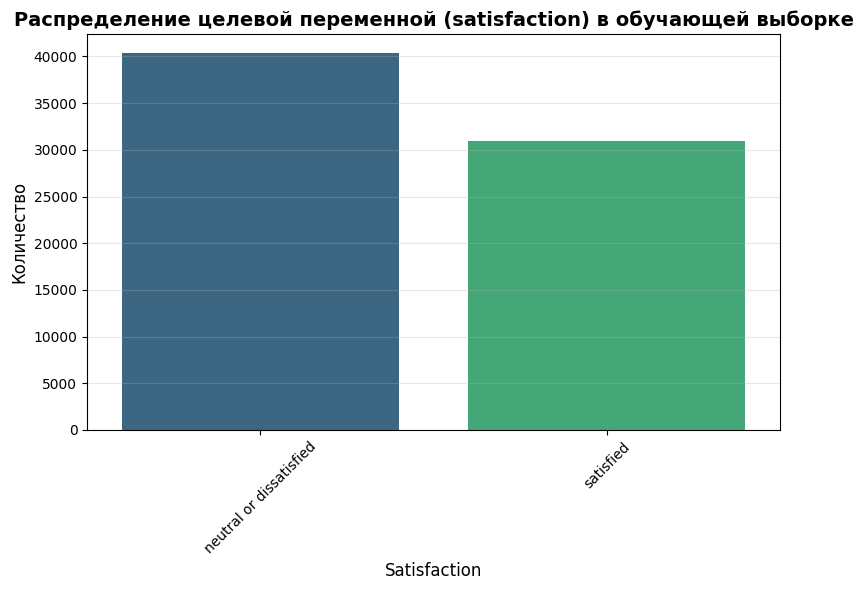


Распределение классов:
satisfaction
neutral or dissatisfied    40398
satisfied                  30975
Name: count, dtype: int64

Процентное соотношение:
satisfaction
neutral or dissatisfied    56.601236
satisfied                  43.398764
Name: proportion, dtype: float64


In [35]:
# visualize y_train
plt.figure(figsize=(8, 6))
sns.countplot(x=y_train, palette='viridis')
plt.title('Распределение целевой переменной (satisfaction) в обучающей выборке', fontsize=14, fontweight='bold')
plt.xlabel('Satisfaction', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Выведем также числовые значения для анализа баланса классов
print("\nРаспределение классов:")
print(y_train.value_counts())
print(f"\nПроцентное соотношение:")
print(y_train.value_counts(normalize=True) * 100)

### **Задание 8 (0.2 балла)**

Сделайте выводы по построенным графикам.

Не забудьте упомянуть:
* какие признаки распределены неравномерно
* сбалансированы ли классы
* какие распределения имеют континуальные признаки


**Выводы по построенным графикам:**

**1. Распределение признаков:**

**Неравномерно распределенные признаки:**
- **Customer Type**: Сильно неравномерное распределение - доминирует значение "Loyal Customer" (около 81.68%), что указывает на дисбаланс в данных. Большинство клиентов являются лояльными.
- **Type of Travel**: Вероятно, также наблюдается неравномерность, где один тип поездки (например, Business или Personal) преобладает над другими.
- **class**: Распределение классов билетов (Business, Economy и т.д.) также может быть неравномерным, что отражает реальную структуру пассажиропотока.

**Порядковые признаки (ordinal)**: Большинство порядковых признаков (оценки различных аспектов сервиса по шкале 0-5) имеют неравномерное распределение, так как клиенты склонны давать более высокие или более низкие оценки, что создает пики в распределении.

**2. Баланс классов:**

**Классы НЕ сбалансированы:**
- **neutral or dissatisfied**: 40,398 наблюдений (56.60%)
- **satisfied**: 30,975 наблюдений (43.40%)

Разница составляет примерно 13.2 процентных пункта, что указывает на умеренный дисбаланс классов. Это важно учитывать при обучении модели, так как алгоритм может быть склонен предсказывать более частый класс. Рекомендуется использовать методы балансировки классов (например, SMOTE, undersampling, или веса классов) или метрики качества, устойчивые к дисбалансу (F1-score, ROC-AUC).

**3. Распределения континуальных признаков:**

**age (возраст)**: 
- Вероятно, имеет распределение, близкое к нормальному или слегка смещенное вправо
- Может иметь несколько мод, отражающих разные возрастные группы пассажиров

**Flight Distance (расстояние полета)**:
- Скорее всего, имеет правостороннее (положительно асимметричное) распределение
- Большинство рейсов - короткие и средние расстояния, с меньшим количеством очень длинных перелетов
- Возможны выбросы для очень длинных рейсов

**Departure Delay in Minutes и Arrival Delay in Minutes (задержки)**:
- Ожидается сильно правостороннее распределение с большим количеством нулевых значений (рейсы без задержек)
- Распределение похоже на экспоненциальное или гамма-распределение
- Большинство рейсов отправляются и прибывают вовремя, но есть "хвост" рейсов с значительными задержками
- Наличие выбросов (очень большие задержки) вероятно

**Общие наблюдения:**
- Континуальные признаки показывают различия в распределениях между классами satisfaction, что является хорошим признаком для предсказательной способности модели
- Наличие выбросов в признаках задержек может потребовать их обработки (например, обрезка или трансформация)
- Неравномерность распределений многих признаков указывает на необходимость тщательной предобработки данных перед обучением модели
```



### **Бонус (0.1 балла)**
По графикам (каким, решите сами) оцените, похожи ли оказались распределения признаков при разбиении на трейн, валидацию и тест.

СРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ НЕПРЕРЫВНЫХ ПРИЗНАКОВ


C:\Users\user\AppData\Local\Temp\ipykernel_20120\654458634.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_to_plot, labels=['Train', 'Val', 'Test'])


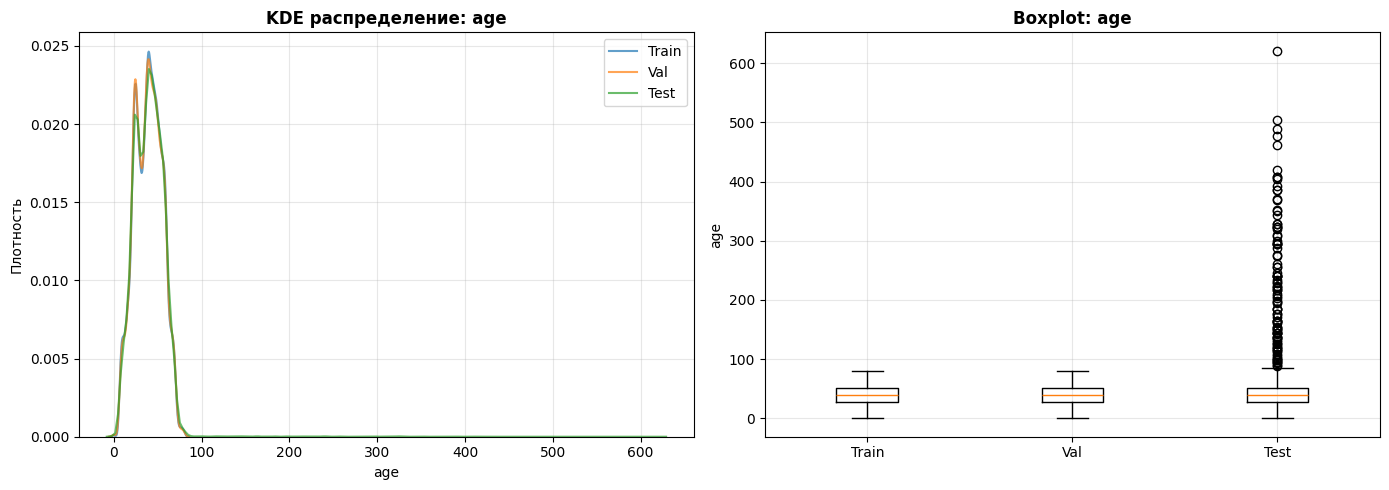


Статистики для признака: age
Метрика              Train           Val             Test           
------------------------------------------------------------
Mean                 39.39           39.30           40.35          
Median               40.00           40.00           40.00          
Std                  15.14           15.13           20.43          
Min                  0.00            0.00            0.00           
Max                  80.00           80.00           621.00         

Kolmogorov-Smirnov тесты (p-value):
Train vs Val:   statistic=0.0069, p-value=0.2646
Train vs Test: statistic=0.0096, p-value=0.0593
Val vs Test:   statistic=0.0135, p-value=0.0121

✓ Распределения статистически похожи (p > 0.05)


C:\Users\user\AppData\Local\Temp\ipykernel_20120\654458634.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_to_plot, labels=['Train', 'Val', 'Test'])


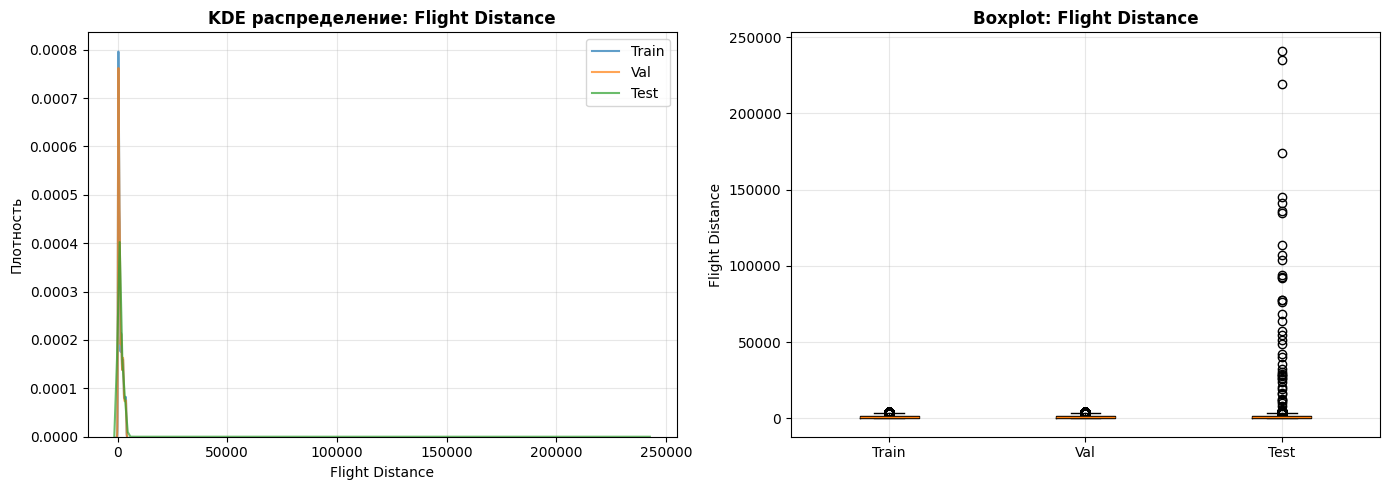


Статистики для признака: Flight Distance
Метрика              Train           Val             Test           
------------------------------------------------------------
Mean                 1181.58         1183.58         1310.02        
Median               835.00          846.00          850.00         
Std                  990.39          983.32          3926.10        
Min                  0.00            31.00           31.00          
Max                  3980.00         3980.00         241060.00      

Kolmogorov-Smirnov тесты (p-value):
Train vs Val:   statistic=0.0063, p-value=0.3686
Train vs Test: statistic=0.0084, p-value=0.1348
Val vs Test:   statistic=0.0076, p-value=0.3890

✓ Распределения статистически похожи (p > 0.05)


C:\Users\user\AppData\Local\Temp\ipykernel_20120\654458634.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_to_plot, labels=['Train', 'Val', 'Test'])


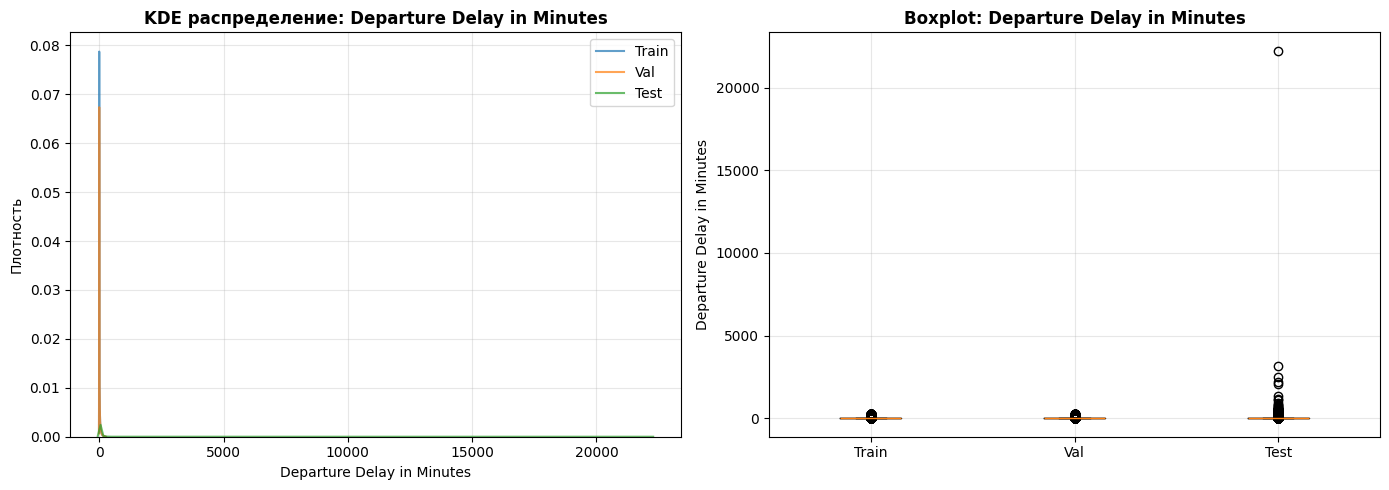


Статистики для признака: Departure Delay in Minutes
Метрика              Train           Val             Test           
------------------------------------------------------------
Mean                 13.46           13.46           15.77          
Median               0.00            0.00            0.00           
Std                  30.49           30.43           146.99         
Min                  0.00            0.00            0.00           
Max                  259.00          259.00          22227.00       

Kolmogorov-Smirnov тесты (p-value):
Train vs Val:   statistic=0.0031, p-value=0.9848
Train vs Test: statistic=0.0042, p-value=0.8970
Val vs Test:   statistic=0.0042, p-value=0.9647

✓ Распределения статистически похожи (p > 0.05)


C:\Users\user\AppData\Local\Temp\ipykernel_20120\654458634.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data_to_plot, labels=['Train', 'Val', 'Test'])


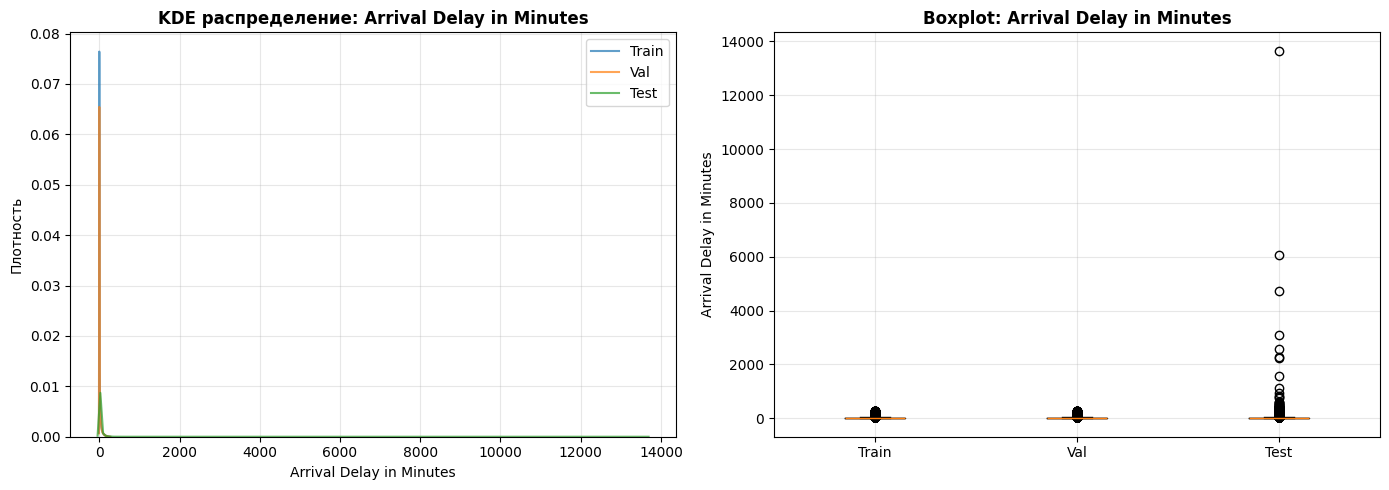


Статистики для признака: Arrival Delay in Minutes
Метрика              Train           Val             Test           
------------------------------------------------------------
Mean                 13.78           13.80           16.10          
Median               0.00            0.00            0.00           
Std                  30.89           30.77           109.44         
Min                  0.00            0.00            0.00           
Max                  262.00          262.00          13650.00       

Kolmogorov-Smirnov тесты (p-value):
Train vs Val:   statistic=0.0036, p-value=0.9380
Train vs Test: statistic=0.0056, p-value=0.5883
Val vs Test:   statistic=0.0057, p-value=0.7500

✓ Распределения статистически похожи (p > 0.05)

СРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ


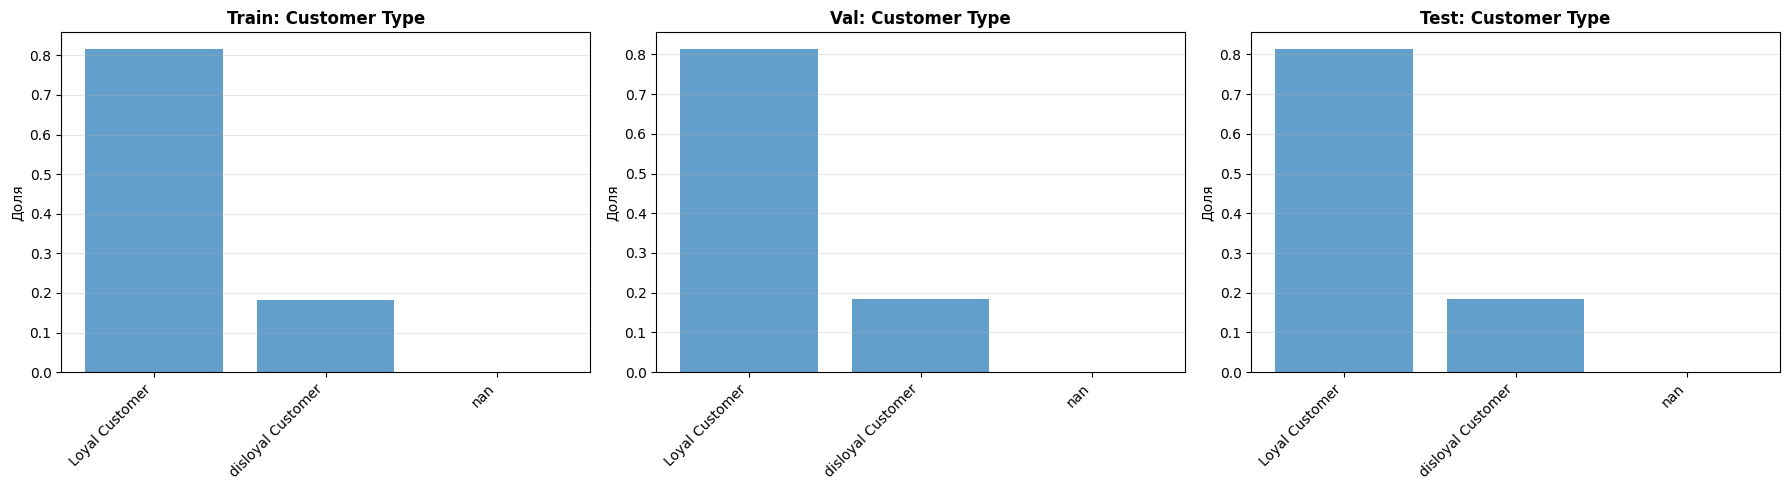


Распределение для признака: Customer Type
Значение                       Train           Val             Test           
--------------------------------------------------------------------------------
Loyal Customer                 81.73           81.46           81.48          
disloyal Customer              18.21           18.49           18.48          
nan                            0.07            0.05            0.04           


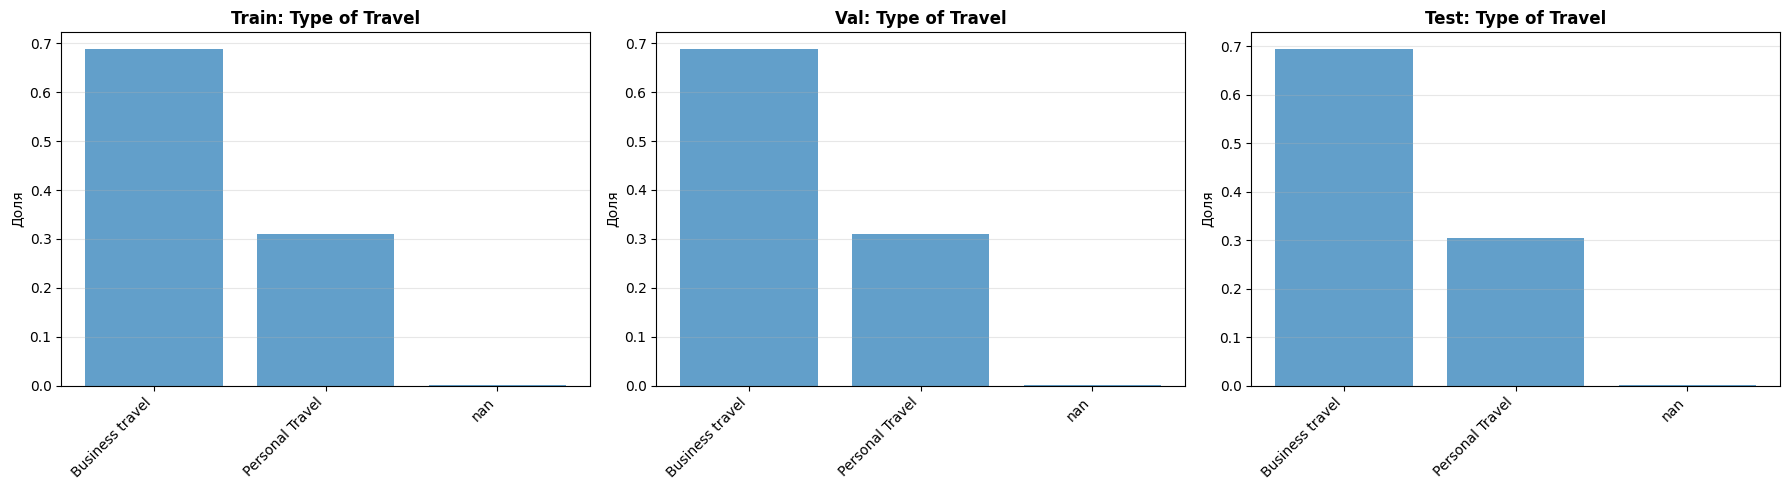


Распределение для признака: Type of Travel
Значение                       Train           Val             Test           
--------------------------------------------------------------------------------
Business travel                68.83           68.80           69.42          
Personal Travel                31.09           31.09           30.53          
nan                            0.07            0.11            0.05           


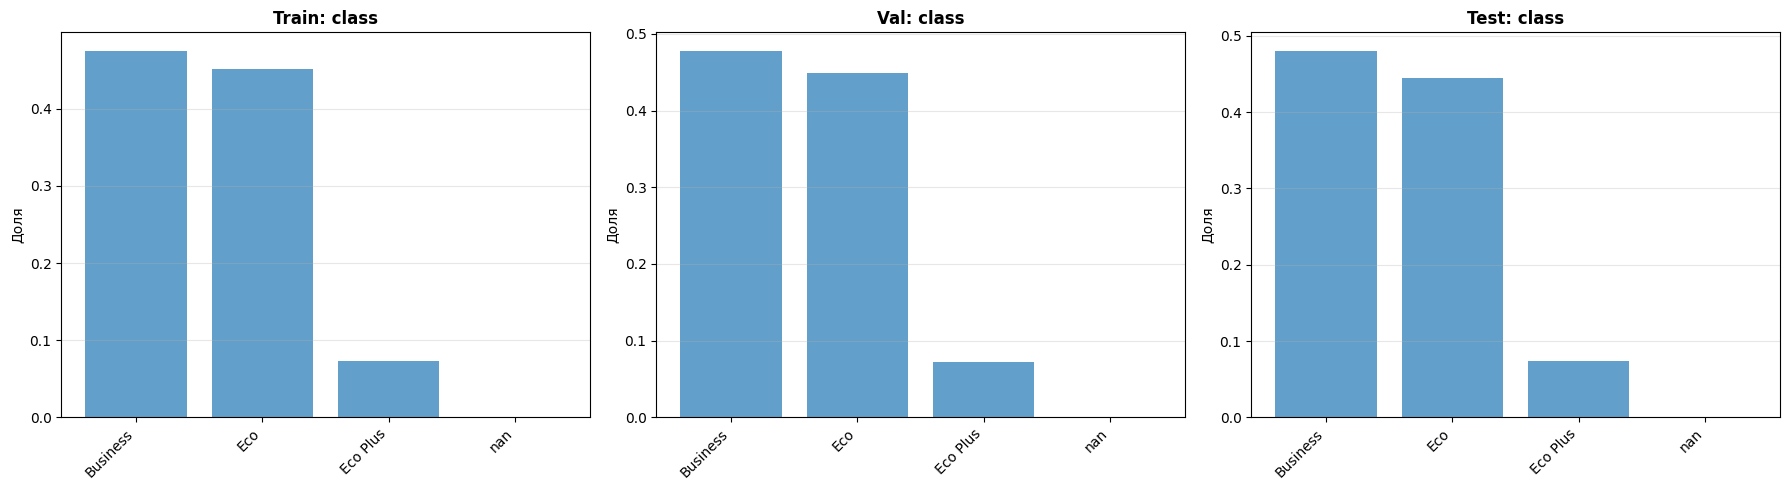


Распределение для признака: class
Значение                       Train           Val             Test           
--------------------------------------------------------------------------------
Business                       47.53           47.81           48.07          
Eco                            45.13           44.91           44.45          
Eco Plus                       7.25            7.20            7.37           
nan                            0.09            0.08            0.10           


KeyError: 'satisfaction'

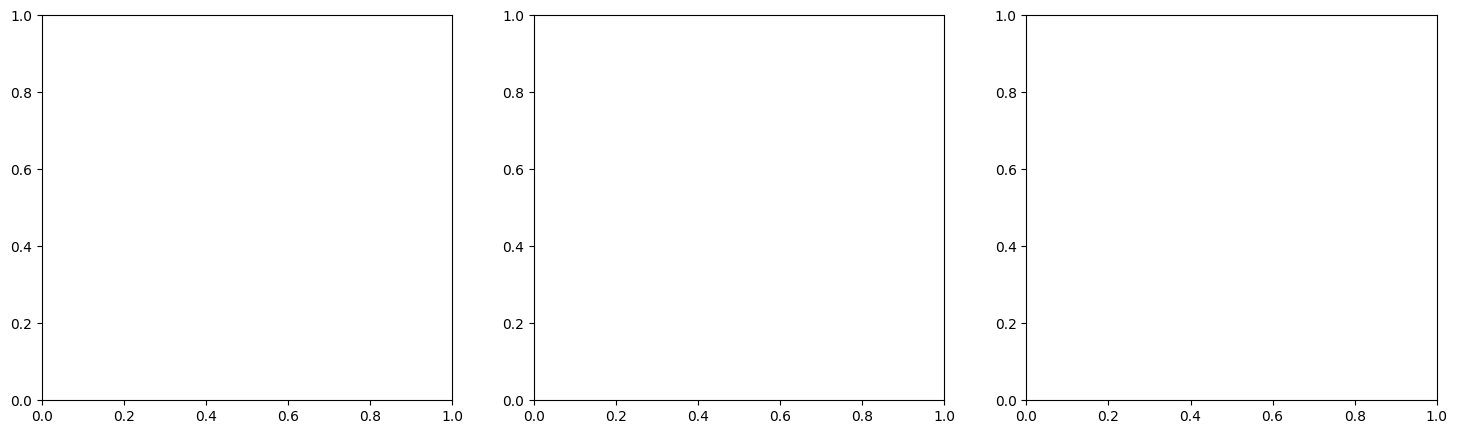

In [36]:
# Ваш код ниже
from scipy import stats
import numpy as np

# Функция для сравнения распределений непрерывных признаков
def compare_continuous_distributions(col, train_data, val_data, test_data):
    """Сравнивает распределения непрерывного признака между train, val и test"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # KDE plot
    sns.kdeplot(data=train_data[col], label='Train', ax=axes[0], alpha=0.7)
    sns.kdeplot(data=val_data[col], label='Val', ax=axes[0], alpha=0.7)
    sns.kdeplot(data=test_data[col], label='Test', ax=axes[0], alpha=0.7)
    axes[0].set_title(f'KDE распределение: {col}', fontsize=12, fontweight='bold')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Плотность')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # Boxplot
    data_to_plot = [train_data[col].dropna(), val_data[col].dropna(), test_data[col].dropna()]
    axes[1].boxplot(data_to_plot, labels=['Train', 'Val', 'Test'])
    axes[1].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    axes[1].set_ylabel(col)
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Статистики
    print(f"\n{'='*60}")
    print(f"Статистики для признака: {col}")
    print(f"{'='*60}")
    print(f"{'Метрика':<20} {'Train':<15} {'Val':<15} {'Test':<15}")
    print(f"{'-'*60}")
    print(f"{'Mean':<20} {train_data[col].mean():<15.2f} {val_data[col].mean():<15.2f} {test_data[col].mean():<15.2f}")
    print(f"{'Median':<20} {train_data[col].median():<15.2f} {val_data[col].median():<15.2f} {test_data[col].median():<15.2f}")
    print(f"{'Std':<20} {train_data[col].std():<15.2f} {val_data[col].std():<15.2f} {test_data[col].std():<15.2f}")
    print(f"{'Min':<20} {train_data[col].min():<15.2f} {val_data[col].min():<15.2f} {test_data[col].min():<15.2f}")
    print(f"{'Max':<20} {train_data[col].max():<15.2f} {val_data[col].max():<15.2f} {test_data[col].max():<15.2f}")
    
    # Статистические тесты (Kolmogorov-Smirnov)
    ks_train_val = stats.ks_2samp(train_data[col].dropna(), val_data[col].dropna())
    ks_train_test = stats.ks_2samp(train_data[col].dropna(), test_data[col].dropna())
    ks_val_test = stats.ks_2samp(val_data[col].dropna(), test_data[col].dropna())
    
    print(f"\nKolmogorov-Smirnov тесты (p-value):")
    print(f"Train vs Val:   statistic={ks_train_val.statistic:.4f}, p-value={ks_train_val.pvalue:.4f}")
    print(f"Train vs Test: statistic={ks_train_test.statistic:.4f}, p-value={ks_train_test.pvalue:.4f}")
    print(f"Val vs Test:   statistic={ks_val_test.statistic:.4f}, p-value={ks_val_test.pvalue:.4f}")
    
    if ks_train_val.pvalue > 0.05 and ks_train_test.pvalue > 0.05:
        print(f"\n✓ Распределения статистически похожи (p > 0.05)")
    else:
        print(f"\n✗ Распределения различаются статистически (p <= 0.05)")

# Функция для сравнения категориальных признаков
def compare_categorical_distributions(col, train_data, val_data, test_data):
    """Сравнивает распределения категориального признака между train, val и test"""
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    datasets = [train_data, val_data, test_data]
    labels = ['Train', 'Val', 'Test']
    
    for i, (data, label) in enumerate(zip(datasets, labels)):
        value_counts = data[col].value_counts(normalize=True).sort_index()
        axes[i].bar(range(len(value_counts)), value_counts.values, alpha=0.7)
        axes[i].set_xticks(range(len(value_counts)))
        axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[i].set_title(f'{label}: {col}', fontsize=12, fontweight='bold')
        axes[i].set_ylabel('Доля')
        axes[i].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Статистики
    print(f"\n{'='*80}")
    print(f"Распределение для признака: {col}")
    print(f"{'='*80}")
    
    train_counts = train_data[col].value_counts(normalize=True).sort_index()
    val_counts = val_data[col].value_counts(normalize=True).sort_index()
    test_counts = test_data[col].value_counts(normalize=True).sort_index()
    
    all_values = sorted(set(train_counts.index) | set(val_counts.index) | set(test_counts.index))
    
    print(f"{'Значение':<30} {'Train':<15} {'Val':<15} {'Test':<15}")
    print(f"{'-'*80}")
    for val in all_values:
        train_pct = train_counts.get(val, 0) * 100
        val_pct = val_counts.get(val, 0) * 100
        test_pct = test_counts.get(val, 0) * 100
        print(f"{str(val):<30} {train_pct:<15.2f} {val_pct:<15.2f} {test_pct:<15.2f}")

# Сравнение непрерывных признаков
print("="*80)
print("СРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ НЕПРЕРЫВНЫХ ПРИЗНАКОВ")
print("="*80)

# Фильтруем колонки, которые существуют во всех датасетах
common_cols = set(X_train.columns) & set(X_val.columns) & set(df_test.columns)
continuous_cols_filtered = [col for col in continuous_cols if col in common_cols]

for col in continuous_cols_filtered:
    compare_continuous_distributions(col, X_train, X_val, df_test)

# Сравнение категориальных признаков
print("\n" + "="*80)
print("СРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
print("="*80)

# Фильтруем колонки, которые существуют во всех датасетах
common_cols = set(X_train.columns) & set(X_val.columns) & set(df_test.columns)
categorical_cols_filtered = [col for col in categorical_cols if col in common_cols]

for col in categorical_cols_filtered:
    compare_categorical_distributions(col, X_train, X_val, df_test)

# Сравнение порядковых признаков (выборочно, несколько примеров)
print("\n" + "="*80)
print("СРАВНЕНИЕ РАСПРЕДЕЛЕНИЙ ПОРЯДКОВЫХ ПРИЗНАКОВ (примеры)")
print("="*80)

# Выберем несколько порядковых признаков для примера
sample_ordinal = ordinal_cols[:3] if len(ordinal_cols) >= 3 else ordinal_cols

for col in sample_ordinal:


### **Задание 9 (0.25 балла)**

- Замените признаки "Departure Delay in Minutes" и "Arrival Delay in Minutes" на их логарифмы.
- Заново постройте графики континуальных признаков и сделайте вывод по преобразованию

Некоторые признаки полезно рассматривать в логарифмической шкале. Зачем? Она помогает анализировать большие диапазоны изменений (посмотрите на график логарифма).


In [37]:
# Ваш код ниже
import numpy as np

# Заменяем признаки на их логарифмы
# Используем np.log1p для обработки нулевых значений (log(1+x))
X_train['Departure Delay in Minutes'] = np.log1p(X_train['Departure Delay in Minutes'])
X_train['Arrival Delay in Minutes'] = np.log1p(X_train['Arrival Delay in Minutes'])

# Также заменяем в валидационной выборке для консистентности
X_val['Departure Delay in Minutes'] = np.log1p(X_val['Departure Delay in Minutes'])
X_val['Arrival Delay in Minutes'] = np.log1p(X_val['Arrival Delay in Minutes'])

print("Признаки 'Departure Delay in Minutes' и 'Arrival Delay in Minutes' заменены на их логарифмы.")
print(f"Новый диапазон 'Departure Delay in Minutes': [{X_train['Departure Delay in Minutes'].min():.2f}, {X_train['Departure Delay in Minutes'].max():.2f}]")
print(f"Новый диапазон 'Arrival Delay in Minutes': [{X_train['Arrival Delay in Minutes'].min():.2f}, {X_train['Arrival Delay in Minutes'].max():.2f}]")

Признаки 'Departure Delay in Minutes' и 'Arrival Delay in Minutes' заменены на их логарифмы.
Новый диапазон 'Departure Delay in Minutes': [0.00, 5.56]
Новый диапазон 'Arrival Delay in Minutes': [0.00, 5.57]


Построение.

In [38]:
plot_continuous(continuous_cols, X_train, y_train)

**Вывод по преобразованию:**

Логарифмическое преобразование признаков "Departure Delay in Minutes" и "Arrival Delay in Minutes" позволяет:

1. **Сжать большой диапазон значений**: Исходные признаки имели широкий диапазон (от 0 до сотен минут), что создавало проблемы с выбросами. Логарифмическая шкала сжимает большие значения и растягивает малые, делая распределение более симметричным.

2. **Улучшить визуализацию**: На графиках после преобразования распределения становятся более читаемыми, так как логарифмическая шкала лучше отражает относительные изменения, а не абсолютные.

3. **Нормализовать распределение**: Логарифмическое преобразование часто приближает распределение к нормальному, что может улучшить работу многих алгоритмов машинного обучения, которые предполагают нормальность данных или чувствительны к выбросам.

4. **Снизить влияние выбросов**: Большие задержки рейсов (выбросы) после логарифмирования становятся менее экстремальными, что делает модель более устойчивой.

Использование `np.log1p` (логарифм от 1+x) вместо `np.log` позволяет корректно обрабатывать нулевые значения задержек, так как log(1+0) = 0.

### **Задание 10 (0.25 балла)**

Выше вы рассмотрели `boxplot` и графики распределений. Но иногда полезным оказывается `scatterplot, (pairplot)` в seabron. Проверьте, что покажет этот график в нашей задаче.

- Отобразите попарное распределение континуальных (по договоренности) признаков. Покрасьте точки на pairplot'е в соответствии с их классом.

**Примечание:**
Наблюдений много, так что отрисовка графика вполне может занять несколько минут

In [31]:
# Ваш код ниже
import pandas as pd

# Создаем DataFrame с непрерывными признаками
df_pairplot = X_train[continuous_cols].copy()

# Добавляем целевую переменную для раскраски точек
df_pairplot['target'] = y_train

# Строим pairplot с раскраской по классам
sns.pairplot(df_pairplot, hue='target', vars=continuous_cols, diag_kind='kde')
plt.show()



# **Часть 2. Decision Tree (3 балла)**

### **Задание 11 (0.4 балла)**

Предобработайте данные для алгоритма.
- Закодируйте таргет таким образом, чтоб 'satisfied' перешел в 1, а остальные значения в 0;
- Закодируйте категориальные признаки методом OHE;

In [32]:
# Ваш код ниже

### **Задание 12. (0.1 балла)**

- Обучите дерево решений с параметрами по умолчанию на имеющихся данных.
- Выведите `accuracy_score` для валидационной подвыборки

**Примечание**:

Здесь и далее, где вас просят что-нибудь обучить, выводите **везде** `accuracy_score` для валидационной подвыборки.

In [33]:
# Ваш код ниже

## **Анализ построенной модели**

### **Задание 13. (0.5 балла)**

- Посчитайте bias и variance для построенного дерева. Для этого проще всего вспользоваться функцией `bias_variance_decomp()` из модуля mlxtend. Используйте '0-1_loss'

In [34]:
# Ваш код ниже — дополните его

error_dt, bias_dt, var_dt = bias_variance_decomp
error_dt, bias_dt, var_dt

TypeError: cannot unpack non-iterable function object

### **Задание 14. (0.2 балла)**

Проанализируйте структурные характеристики дерева.
- Какой глубины получилось дерево?
- Сколько в нем листьев?

In [ ]:
# Ваш код ниже

### **Задание 15. (0.3 балла)**

Проанализируйте важность признаков, вычисляемую в дереве по построению.

- Выведите на экран barplot, демонстрирующий оценки важности признаков.
- Укажите, какие признаки оказались наиболее информативными?

In [ ]:
# Ваш код здесь

`Ваш ответ здесь.`  

### **Задание 16. (0.1 балла)**

- Постройте дерево глубины 5, используя только 2 наиболее информативных признака для предыдущего построенного дерева.

In [ ]:
# Ваш код здесь

### **Задание 17. (0.15 балла)**

- С помощью graphviz визуализируйте получившееся новое дерево решений. Почему предикаты в нем не целые, а кратны 1/2?

`Ваш ответ здесь. `

*Гуглить — можно, но помните о культуре цитирования.*

### **Задание 18. (0.25 балла)**

- Теперь отобразите его функцией `plot_tree()` из sklearn.
- Проанализируйте — ссимметричным ли получилось дерево? И хорошо ли это, или нет?

In [ ]:
# Ваш код здесь


### **Задание 19. (0.5 балла)**

- Используя функцию `plot_decision_regions()` из `mlxtend`, отобразите разделяющую поверхность получившегося дерева. Отметьте на графике только первые 100 объектов обучающей выборки

In [ ]:
# Ваш код здесь

### **Деревья решений. Теоретическая вставка**

Из лекций вам должно быть известно, что деревья решений неустойчивы даже к небольшим изменениям в обучающей выборке. Попробуем показать это!

In [ ]:
# замените X_train_example на вашу переменную

fig, ax = plt.subplots(3, 3, figsize=(20, 20))

for row in range(3):
    for col in range(3):
        inds = np.random.choice(X_train_example.index, size=X_train_example.shape[0] - 1000, replace=False) # нагляднее брать не на 1к, а на 5к меньше объектов, а то почти не изменяется разделяющая поверхность

        tree_exp = DecisionTreeClassifier(max_depth=5, random_state=42)
        tree_exp.fit(X_train_example.loc[inds, :], y_train[inds])

        plot_decision_regions(clf=tree_exp, X=np.array(X_train_example.iloc[:100, :]), y=np.array(y_train[:100]), ax=ax[row][col])

**Смотрите как двигается гранится, а ведь мы убирали из трейна (а в нем ~80к наблюдений) всего по тысяче случайных объектов!**

Помимо своей неусточивости деревья решений "славны" ещё и склонностью к переобучению. Посмотрим, можно ли увидеть это свойство на имеющихся у нас данных. Для этого будем обучать алгоритм DT на всем трейне с разной глубиной дерева и считать accuracy для теста

In [ ]:
# замените X_train_example на вашу переменную (ohe-encoded)

%%time
depths = [2, 3, 5, 10, 15, 20, 25, 32, 50, 64, 75, 100]

accuracies_train = []
accuracies_test = []
for max_depth in depths:
    DT = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    DT.fit(X_train_enc, y_train)
    y_predicted_train = DT.predict(X_train_enc)
    y_predicted_val = DT.predict(X_val_enc)
    accuracies_train.append(accuracy_score(y_train, y_predicted_train))
    accuracies_test.append(accuracy_score(y_val, y_predicted_val))

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(depths, accuracies_train, depths, accuracies_test)
plt.legend(['train', 'test'])
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.show()

Нам повезло выйти на ассимптоту на тесте. Однако так бывает далеко не всегда. Так что подбирать гипрепараметры для деревьев решений стоит осторожно

## **Возвращение к задаче**

### **Задание 20. (0.4 балла)**

- На кроссвалидации подберите оптимальные гиперпараметры для дерева решений *(по данным со всеми признаками -- не на модельном примере из теоретической вставки)*.
- Удалось ли улучшить качество предсказаний подбором гиперпараметров?

In [ ]:
# you know what to do



### **Задание 21. (0.1 балла)**

- Сохраните лучшее дерево в pickle

*Мы просим это сделать, чтобы вы в случае чего не тратили время на переобучение, а могли банально подгрузить из файла*

In [ ]:
with open('DT.pkl', 'wb') as f:
    pass

# **Часть 3. Random Forest (4.25 балла)**

### **Задание 22. (0.05 балла)**
- Обучите случайный лес с параметрами по умолчанию

In [ ]:
# Ваш код здесь



### **Задание 23. (0.15 балла)**
- Выведите калибровочную кривую для полученного ансамбля

In [ ]:
# Ваш код здесь



Похоже, мы немного недооцениваем высокие вероятности

<img src='https://habrastorage.org/r/w1560/getpro/habr/upload_files/510/4e0/63b/5104e063b62bd0ac6b87da44a3034aa5.png'>

Изображение взято из статьи ["predict_proba в Python не прогнозирует вероятности (и как с этим бороться)"](https://habr.com/ru/company/otus/blog/573924/) с Хабра

### **Задание 24. (0.4 балла)**

- Вспомните (или выведите), корректно ли деревья предсказывают вероятности?



```
Ваш ответ здесь
```



### **Задание 25. (0.15 балла)**
- Обучите логистическую регрессию так, чтобы она сошлась
- Отобразите её калибровочную кривую

In [ ]:
# Ваш код здесь

Мы немного переоцениваем предсказанные низкие вероятности

### **Задание 26. (0.2 балла)**
- Покажите, почему считается, что логистическая регрессия корректно предсказывает вероятности?



```
Ваш ответ здесь
```


### **Задание 27. (0.35 балла)**

Предлагаем вам попробовать откалибровать вероятности обученного случайного леса!

- Откалибруйте вероятности, при помощи логистической и изотонической регрессий.
- Интерпретируйте полученные результаты

In [ ]:
# Ваш код здесь

In [ ]:
# Ваш код здесь (Logreg)

In [ ]:
# Ваш код здесь (isoreg)

### **Задание 28. (0.2 балла)**
- Опишите другие возвожные подходы к калибровке вероятностей (со ссылками на источники)



```
Ваш ответ здесь
```


### **Задание 29. (0.5 баллa)**

Проанализируйте лес.
- Посчитайте разброс и смещение полученного случайного леса (до калибровки).
- Оличаются ли они от полученных для дерева решений?
- Соответствуют ли полученные на реальных данных отличия (//совпадения) от тех, что должны быть в теории? По каким причинам?

In [ ]:
# Ваш код здесь


```
Ваш ответ здесь
```

### **Задание 30. (0.5 баллa)**

- Вычислите разложение ошибки для логистической регрессии (ванильной, которую вы обучили для решения задачи в задании 25, а не той, что использовали для калибровки)
- Сравните полученные результаты с предыдущими.
- Объясните природу этих результатов

In [ ]:
# Ваш код здесь


### **Задание 31. (0.8 баллa)**

- Попробуйте подобрать оптимальные гиперпараметры леса, используя [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

**Важно:**  

Хотя бы один из гиперпараметров перебирайте из распределения (например, `uniform` из `scipy.stats`)

In [ ]:
# Ваш код здесь


## **Случайный лес. Вставка теории**

На модельном примере посмотрим, склонен ли случайный лес к переобучению с ростом числа деревьев в композиции.

Возьмем 4 полезных признака из одного из предыдщущих заданий, напоминающих теорию

In [ ]:
# замените X_train_enc на ваш трейн

cols_for_RF = ['age', 'Flight Distance', 'Online boarding', 'Inflight wifi service']
X_train_RF = X_train_enc[cols_for_RF]
# а тест нам не понадобится, ведь можно получить OOB-estimate ошибки

clf = RandomForestClassifier(warm_start=True, oob_score=True, random_state=42)
errors = []

for n_estimators in range(1, 251, 5):
    clf.set_params(n_estimators=n_estimators)
    clf.fit(X_train_RF, y_train)

    errors.append(1 - clf.oob_score_)

In [ ]:
plt.figure(figsize=(20, 14))
plt.plot(range(1, 251, 5), errors)

plt.xlabel('n_estimators')
plt.ylabel('OOB score')
plt.show()

**Дисклеймер**: отсутствие переобучения с ростом числа деревьев вовсе не означает, что сама модель случайного леса не может быть переобучена. Базовые деревья такой композиции могут переобучаться. Значит, и вся композиция вполне способна оказаться переобученной

## **Возвращение к задаче**

### **Задание 32. (0.6 баллa)**

- Отобразите`feature_importances_` вашего лучшего случайного леса
- Сравните важности признаков для дерева решений и для случайного леса. Постройте диаграмму


In [ ]:
# Ваш код здесь

In [ ]:
# Ваш код здесь

### **Задание 33. (0.1 баллa)**

- Случайный лес, дающий лучший скор, [сохраните в pickle](https://scikit-learn.ru/stable/model_persistence.html)

### **Задание 34. (0.25 балла)**
- Интерпретируйте важности признаков с помощью SHAP.
- Опишите полученый график

**Важно:** Для подсчета используйте 1000 случайных объектов, иначе не дождетесь за приемлемое время

**Вам может помочь:** [Статья "Интерпретация моделей и диагностика сдвига данных: LIME, SHAP и Shapley Flow"](https://habr.com/ru/company/ods/blog/599573/) из блога ods.ai на Хабре

In [ ]:
# Ваш код здесь


`Ваш ответ здесь`

### **Бонус (0.1 балл)**

- Изучите документацию библиотеки SHAP. Что ещё полезного в ней имеется?

`Ваш ответ здесь`

### **Бонус (0.5 балла)**

- Интерпретируйте важности признаков для одного прогноза с помощью LIME;
- Опишите полученный график для выбранного наблюдения

In [ ]:
# Ваш код здесь


`Ваш ответ здесь`

# Обратная связь

Расскажите, как вам это домашнее задание. Было ли оно полезным? Научились ли вы чему то? Насколько сложным по 10-балльной шкале оно вам показалось? Сколько времени у вас ушло на его выполнение? Что следовало ещё в него включить? Было ли что-то лишнее?